In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from scipy.interpolate import interp1d
import flika as flk
from matplotlib import cm
flk.start_flika()
from scipy.ndimage import rotate
from flika.window import Window as flw
from skimage.exposure import rescale_intensity as rescale

Starting flika
flika menubar already initialized.
Starting flika inside IPython


In [2]:
fname = '/groups/ahrens/ahrenslab/davis/tmp/20181227_4_2_gfaprgeco_gfapcochr_7dpf_stimwaist_20181227_171436/20181227_4_2_gfaprgeco_gfapcochr_7dpf_stimwaist_20181227_171436_dff_condition_0_trave_ds4.tif'
data= imread(fname)

In [3]:
data.shape

(11, 22, 12, 214, 232)

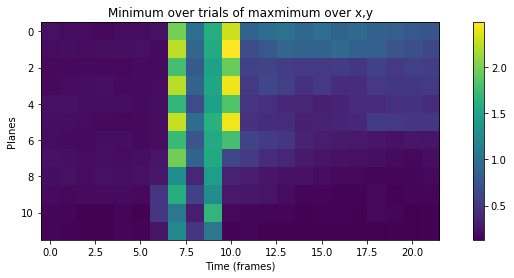

In [4]:
fig, axs = plt.subplots(figsize=(12,4))
axs.imshow(data.max((3,4)).min(0).T);
axs.title.set_text('Minimum over trials of maxmimum over x,y')
axs.set_xlabel('Time (frames)')
axs.set_ylabel('Planes')
plt.colorbar(axs.images[0])

In [7]:
crop = slice(None), slice(0, 220), slice(20,150)
tr_ave = rotate(data.mean(0).max(1), angle=-6, axes=(1,2))[crop]

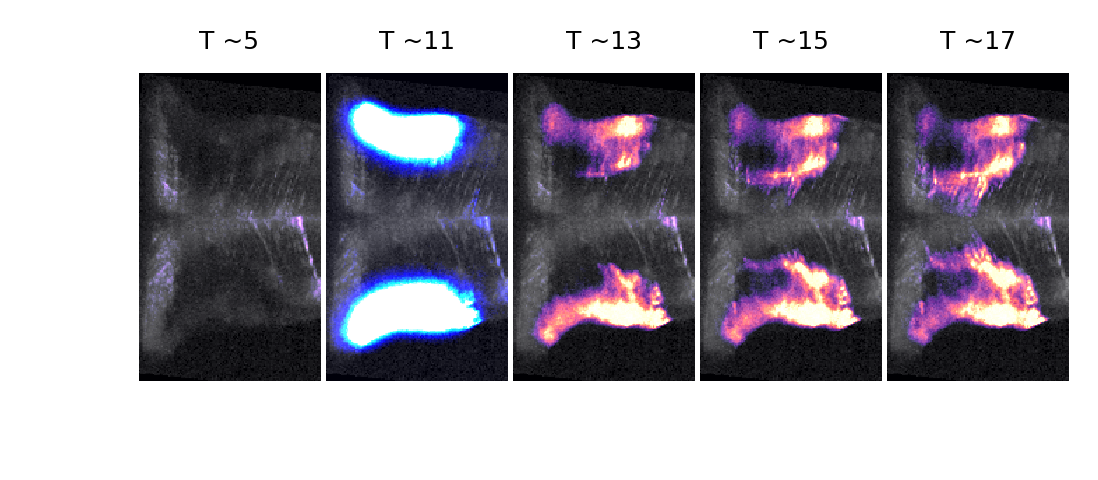

In [20]:
anat = cm.gray(rescale(tr_ave[0], in_range=(.02,.5))) ** .6
ts = [5,11,13,15,17]
fig, axs = plt.subplots(ncols=len(ts), dpi=300, figsize=(4,2))
in_range = (.1,.5)
for ind, ax in enumerate(axs):        
    ax.axis('off')
    rgb = cm.magma(rescale(tr_ave[ts[ind]], in_range=in_range))
    if ts[ind] == 11:
        rgb = cm.hot(rescale(tr_ave[ts[ind]], in_range=in_range))[:,:,(2,1,0,3)]
    ax.imshow(anat + rgb)
    ax.title.set_text(f'T ~{ts[ind]}')
    ax.title.set_fontsize(6)
    plt.subplots_adjust(wspace=.03)

In [137]:
tr_ave = data.mean(0).max(1)
plr_stim = np.arange(5,11)
for t in plr_stim:
    # for each plane, take the trial with the lowest peak
    composite = np.zeros(data.shape[2:])
    for z in range(data.shape[2]):
        ind = np.argmin(data[:,t,z].max((1,2)))
        composite[z] = data[ind,t,z]
    tr_ave[t] = composite.max(0)

In [62]:
flw(tr_ave)

/groups/ahrens/home/bennettd/anaconda3/lib/python3.6/site-packages/pyqtgraph/imageview/ImageView.py:588: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data = data[sl]


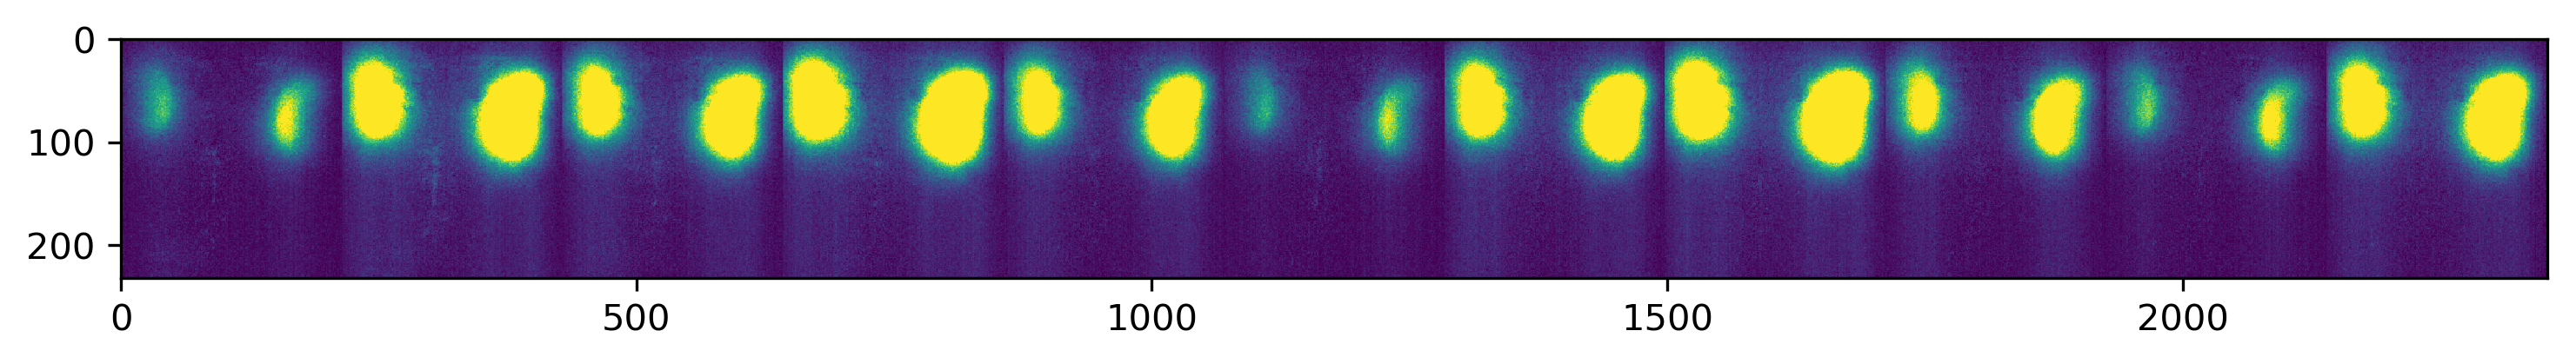

In [129]:
fig, axs = plt.subplots(figsize=(12,12), dpi=300)
axs.imshow(data[:, , -1].reshape(11 * data.shape[3],-1).T, clim=(0,1))

In [49]:
import flika as flk
flk.start_flika()
from flika.window import Window as flw

Starting flika
flika menubar already initialized.
Starting flika inside IPython


In [63]:
z = -1
stim_dur = 5
stim_time = slice(5,5 + stim_dur)
mont = data[:,stim_time,z]

In [64]:
flw(mont.reshape(mont.shape[0], mont.shape[1] * mont.shape[2], mont.shape[3]))